rEFERENCE :https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

C:\Users\Zigron\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Zigron\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Zigron\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
df=pd.read_csv(r'C:\Users\Zigron\Downloads\Mall_Customers.csv')

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


### The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

In [6]:
df=df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [8]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


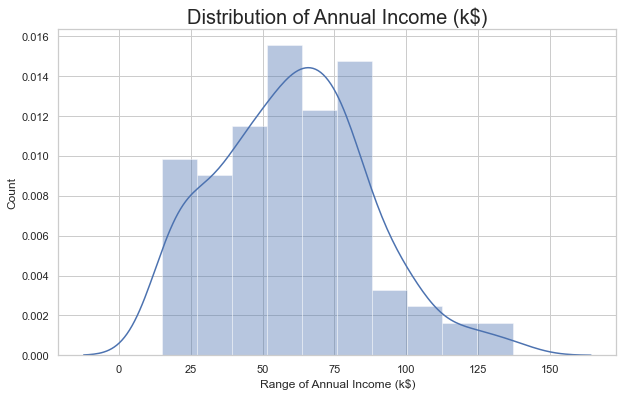

In [13]:
#Annual Income Distribution:

#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


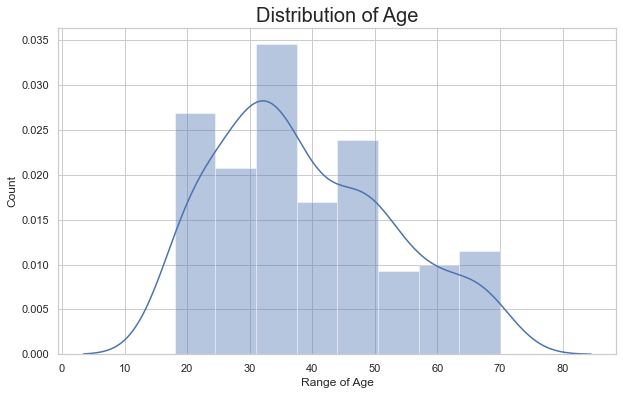

In [16]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

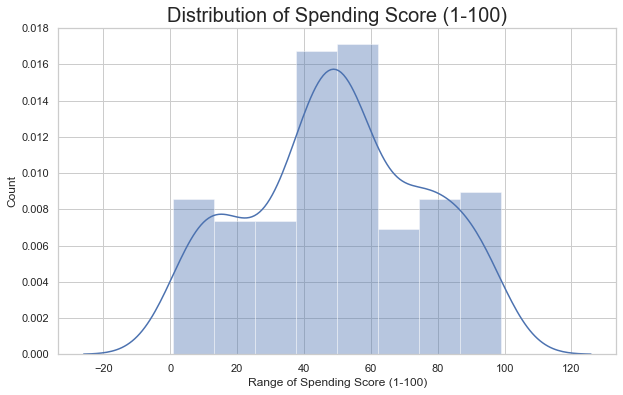

In [18]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

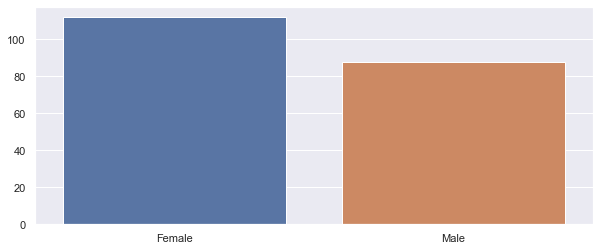

In [26]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [28]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]

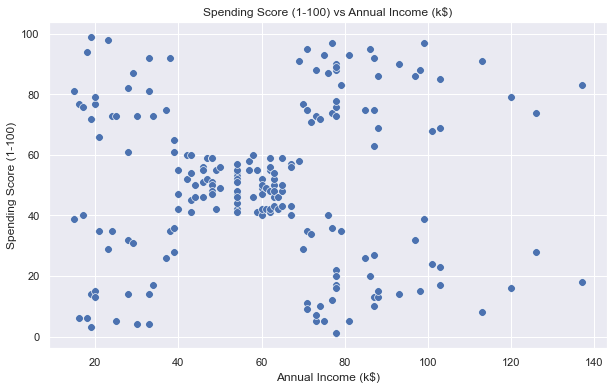

In [29]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [7]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [32]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\Zigron\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


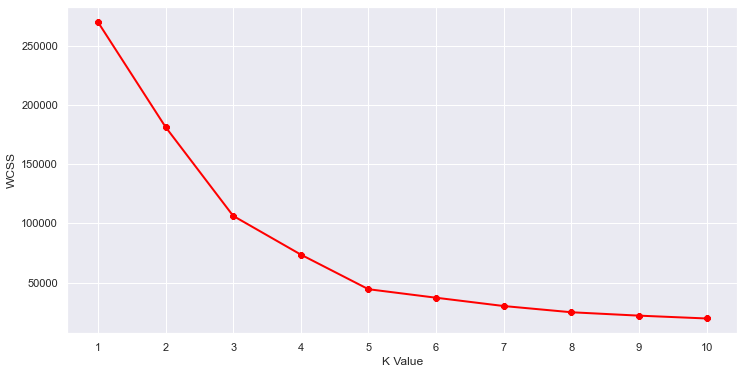

In [34]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [39]:
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(df)
#predicting the labels of the input data
y=km1.predict(df)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


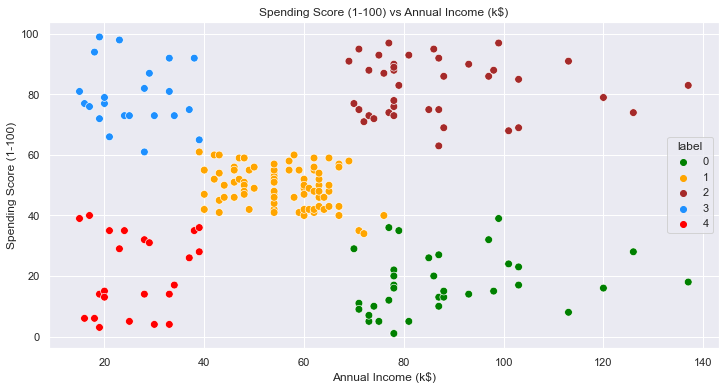

In [41]:
#Scatterplot of the clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.

### k-Means Clustering on the basis of 3D data
Now, we shall be working on 3 types of data. Apart from the spending score and annual income of customers, we shall also take in the age of the customers

In [5]:
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]


C:\Users\Zigron\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


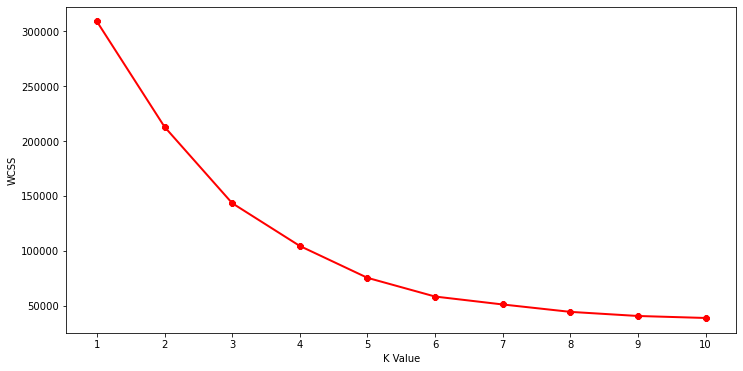

In [9]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [12]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km2.fit_predict(X2)
df["label"] = y2
#The data with labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


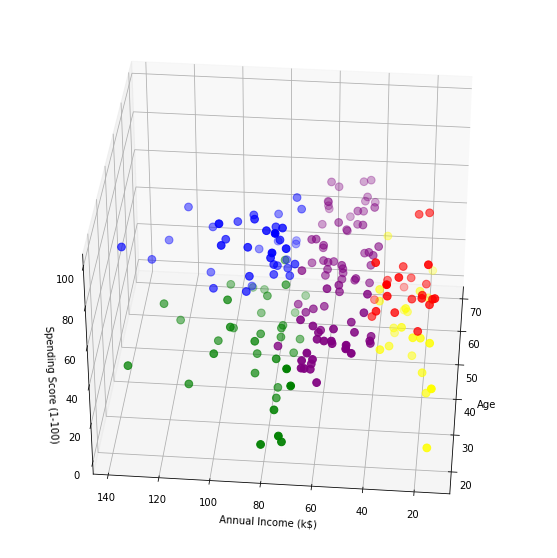

In [13]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()